In [1]:
# Import required libraries
import os
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Change directory
os.chdir(r'C:\Users\ganga\OneDrive\Desktop\Verzeo')
print(os.listdir())

['Naive_Bayes_Model', 'Restaurant_Reviews.tsv', 'Sentiment_analyzer', 'Verzeo major project.pdf']


In [3]:
# Load data
data = pd.read_csv('Restaurant_Reviews.tsv', sep = '\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
# Shape of the data
data.shape

(1000, 2)

    We can observe that there are,
        - 1000 records and 
        - 2 Features

In [5]:
# Information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  1000 non-null   object
 1   Liked   1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


    - There is no null values in the data
    - And two features are in correct format.
        * Review is in object type and 
        * Liked is in integer type

In [6]:
# Renaming columns
data.columns = ['Review', 'Sentiment']

In [7]:
# Data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1000 non-null   object
 1   Sentiment  1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
# Replace 0 and 1 values with Negative and Positive statements
data['Sentiment'] = data['Sentiment'].replace(to_replace=[0, 1], value=['Negative', 'Positive'])

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Review     1000 non-null   object
 1   Sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 15.8+ KB


In [10]:
# Unique values in Review feature
data.Review.nunique()

996

In [11]:
# Unique values in Review feature
data.Review.unique()

array(['Wow... Loved this place.', 'Crust is not good.',
       'Not tasty and the texture was just nasty.',
       'Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.',
       'The selection on the menu was great and so were the prices.',
       'Now I am getting angry and I want my damn pho.',
       "Honeslty it didn't taste THAT fresh.)",
       'The potatoes were like rubber and you could tell they had been made up ahead of time being kept under a warmer.',
       'The fries were great too.', 'A great touch.',
       'Service was very prompt.', 'Would not go back.',
       'The cashier had no care what so ever on what I had to say it still ended up being wayyy overpriced.',
       'I tried the Cape Cod ravoli, chicken, with cranberry...mmmm!',
       'I was disgusted because I was pretty sure that was human hair.',
       'I was shocked because no signs indicate cash only.',
       'Highly recommended.', 'Waitress was a little slow in service.'

In [12]:
# Value counts in each category
data.Sentiment.value_counts()

Positive    500
Negative    500
Name: Sentiment, dtype: int64

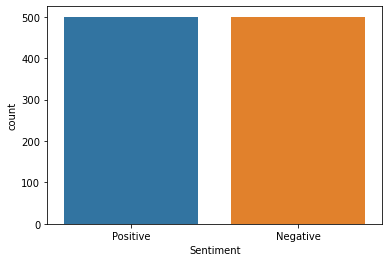

In [13]:
# Visualization of sentiment
sns.countplot(x = 'Sentiment', data=data);

In [14]:
# Null values
data.isnull().sum()

Review       0
Sentiment    0
dtype: int64

In [15]:
# Duplicate records
data.duplicated().sum()

4

In [16]:
# Removing duplicate records
data.drop_duplicates(keep='first', inplace=True)

In [17]:
# Resetting index
data.reset_index(inplace = True, drop = True)

In [18]:
# First five rows of the data
data.head()

,Review,Sentiment
0,Wow... Loved this place.,Positive
1,Crust is not good.,Negative
2,Not tasty and the texture was just nasty.,Negative
3,Stopped by during the late May bank holiday of...,Positive
4,The selection on the menu was great and so wer...,Positive


In [19]:
# Import Natural Language Tool Kit(NLTK)
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [20]:
# Initiate lemmatizer for lemmatization
lemmatizer = WordNetLemmatizer()

In [21]:
# Cleaning
cleaned_data = []
for i in range(0, len(data)):
    words = re.sub('[^a-zA-Z]', ' ', data['Review'][i])
    words = words.lower()
    words = words.split()
    
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    words = ' '.join(words)
    cleaned_data.append(words)

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
# Initiate Count vectorizer
cv = CountVectorizer(ngram_range=(1, 2))

In [24]:
# Count vectorization
X = cv.fit_transform(cleaned_data).toarray()

In [25]:
# Creating data frame after vectorization
pd.set_option('display.max_columns', None)
pd.DataFrame(X, columns=cv.get_feature_names())

absolute  absolute must  absolutely  absolutely amazing  absolutely back  \
0           0              0           0                   0                0   
1           0              0           0                   0                0   
2           0              0           0                   0                0   
3           0              0           0                   0                0   
4           0              0           0                   0                0   
..        ...            ...         ...                 ...              ...   
991         0              0           0                   0                0   
992         0              0           0                   0                0   
993         0              0           0                   0                0   
994         0              0           0                   0                0   
995         0              0           0                   0                0   

     absolutely clue  absolutely delicious  absolutely flat  \
0                  0                     0                0   
1                  0                     0                0   
2                  0                     0                0   
3                  0                     0                0   
4                  0                     0                0   
..               ...                   ...              ...   
991                0                     0                0   
992                0                     0                0   
993                0                     0                0   
994                0                     0                0   
995                0                     0                0   

     absolutely flavor  absolutely star  absolutley  absolutley fantastic  \
0                    0                0           0                     0   
1                    0                0           0                     0   
2                    0                0           0                     0   
3                    0                0           0                     0   
4                    0                0           0                     0   
..                 ...              ...         ...                   ...   
991                  0                0           0                     0   
992                  0                0           0                     0   
993                  0                0           0                     0   
994                  0                0           0                     0   
995                  0                0           0                     0   

     accident  accident could  accommodation  accommodation vegetarian  \
0           0               0              0                         0   
1           0               0              0                         0   
2           0               0              0                         0   
3           0               0              0                         0   
4           0               0              0                         0   
..        ...             ...            ...                       ...   
991         0               0              0                         0   
992         0               0              0                         0   
993         0               0              0                         0   
994         0               0              0                         0   
995         0               0              0                         0   

     accomodate  accomodate vegan  accordingly  accountant  accountant know  \
0             0                 0            0           0                0   
1             0                 0            0           0                0   
2             0                 0            0           0                0   
3             0                 0            0           0                0   
4             0                 0            0           0        

In [26]:
# Declare y variable
y = data['Sentiment']

In [27]:
# Split data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
# Support vector machine
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

SVC(gamma='auto')

In [29]:
# Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
# Predictions
SVC_predictions = clf.predict(X_test)

In [31]:
# Accuracy of the model
accuracy = accuracy_score(y_test, SVC_predictions)
accuracy

0.46987951807228917

In [32]:
# Confusion matrix
cm = confusion_matrix(y_test, SVC_predictions)
cm

array([[  0, 132],
       [  0, 117]], dtype=int64)

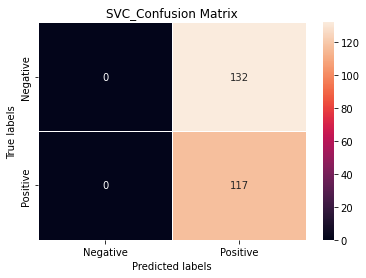

In [33]:
# Visualization of confusion matrix
#annot=True to annotate cells, ftm='g' to disable scientific notation
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, linewidths=1)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('SVC_Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [34]:
# SVC Classification report
print(classification_report(y_test, SVC_predictions))

              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00       132
    Positive       0.47      1.00      0.64       117

    accuracy                           0.47       249
   macro avg       0.23      0.50      0.32       249
weighted avg       0.22      0.47      0.30       249



In [37]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
naive = MultinomialNB()
naive.fit(X_train, y_train)
NB_predictions = naive.predict(X_test)

In [38]:
# Accuracy
NB_accuracy = accuracy_score(y_test, NB_predictions)
NB_accuracy

0.7630522088353414

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test, NB_predictions)
cm

array([[103,  29],
       [ 30,  87]], dtype=int64)

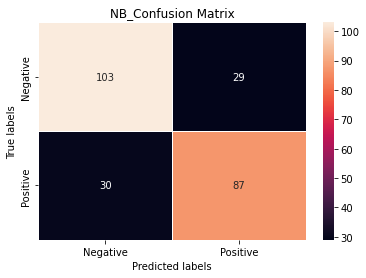

In [41]:
# Visualization of confusion matrix
#annot=True to annotate cells, ftm='g' to disable scientific notation
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax, linewidths=1)
# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('NB_Confusion Matrix')
ax.xaxis.set_ticklabels(['Negative', 'Positive'])
ax.yaxis.set_ticklabels(['Negative', 'Positive'])
plt.show()

In [42]:
# Classification Report
print(classification_report(y_test, NB_predictions))

              precision    recall  f1-score   support

    Negative       0.77      0.78      0.78       132
    Positive       0.75      0.74      0.75       117

    accuracy                           0.76       249
   macro avg       0.76      0.76      0.76       249
weighted avg       0.76      0.76      0.76       249



In [44]:
# Save the model to a file
import joblib
joblib.dump(naive, 'Naive_Bayes_Model')

['Naive_Bayes_Model']

In [45]:
# Load the model from a file
naive_model = joblib.load('Naive_Bayes_Model')
naive_model

MultinomialNB()

In [46]:
# Pipe line
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [47]:
# Declare X and y variables
X = data['Review']
y = data['Sentiment']

In [48]:
# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [68]:
# Pipe line for SVC model
SVC_pipe_line = Pipeline([('count_vectorizer', CountVectorizer()),('SVC_model', SVC(gamma='auto'))])
SVC_pipe_line.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('SVC_model', SVC(gamma='auto'))])

In [69]:
# Predictions of SVC_pipe_line
SVC_PP_predictions = SVC_pipe_line.predict(X_test)

In [71]:
# Accuracy by SVC_PP_predictions
accuracy_score(y_test, SVC_PP_predictions)

0.46987951807228917

In [49]:
# Pipe line for Naive Bayes model
sentiment_analyser = Pipeline([('count_vectorizer', CountVectorizer()),('naive_model', MultinomialNB())])
sentiment_analyser.fit(X_train, y_train)

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('naive_model', MultinomialNB())])

In [50]:
# Predictions
PL_predictions = sentiment_analyser.predict(X_test)

In [51]:
# Confusion matrix
cm = confusion_matrix(y_test, PL_predictions)
cm

array([[111,  21],
       [ 33,  84]], dtype=int64)

In [52]:
# Accuracy of pipeline
accuracy_score(y_test, PL_predictions)

0.7831325301204819

In [56]:
# New predictions
sentiment_analyser.predict(['You are a good boy'])

array(['Positive'], dtype='<U8')

In [63]:
sentiment_analyser.predict(['It is tasteless'])

array(['Negative'], dtype='<U8')

In [64]:
# Save pipeline in a file
joblib.dump(sentiment_analyser, 'Sentiment_analyser')

['Sentiment_analyser']

In [65]:
# Load pipe line
Sentiment_analyser = joblib.load('Sentiment_analyser')
Sentiment_analyser

Pipeline(steps=[('count_vectorizer', CountVectorizer()),
                ('naive_model', MultinomialNB())])

In [66]:
# New prediction
sentiment_analyser.predict(['Wow... Loved this work.'])

array(['Positive'], dtype='<U8')

In [67]:
sentiment_analyser.predict(['He does not have to commute to work.'])

array(['Negative'], dtype='<U8')